# LSTM for Classification Based on Textual Data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Embedding, SimpleRNN
from keras.models import Sequential
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

Using TensorFlow backend.


## Import and preprocess data

In [2]:
max_features = 10000 # number of words to consider as features
max_len = 500 # max number of words in a text
batch_size = 32

print('Loading data ...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test_sequences')

print('Pad sequences')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data ...
25000 train sequences
25000 test_sequences
Pad sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Build and train LSTM

In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 56s - loss: 0.4954 - acc: 0.7645 - val_loss: 0.3179 - val_acc: 0.8742
Epoch 2/10
20000/20000 [==============================] - 56s - loss: 0.2856 - acc: 0.8903 - val_loss: 0.3267 - val_acc: 0.8608
Epoch 3/10
20000/20000 [==============================] - 56s - loss: 0.2300 - acc: 0.9130 - val_loss: 0.3469 - val_acc: 0.8836
Epoch 4/10
20000/20000 [==============================] - 56s - loss: 0.2072 - acc: 0.9244 - val_loss: 0.3338 - val_acc: 0.8710
Epoch 5/10
20000/20000 [==============================] - 56s - loss: 0.1722 - acc: 0.9389 - val_loss: 0.3420 - val_acc: 0.8836
Epoch 6/10
20000/20000 [==============================] - 56s - loss: 0.1554 - acc: 0.9435 - val_loss: 0.5392 - val_acc: 0.8402
Epoch 7/10
20000/20000 [==============================] - 56s - loss: 0.1449 - acc: 0.9493 - val_loss: 0.3584 - val_acc: 0.8672
Epoch 8/10
20000/20000 [==============================]

## Plot training and validation history

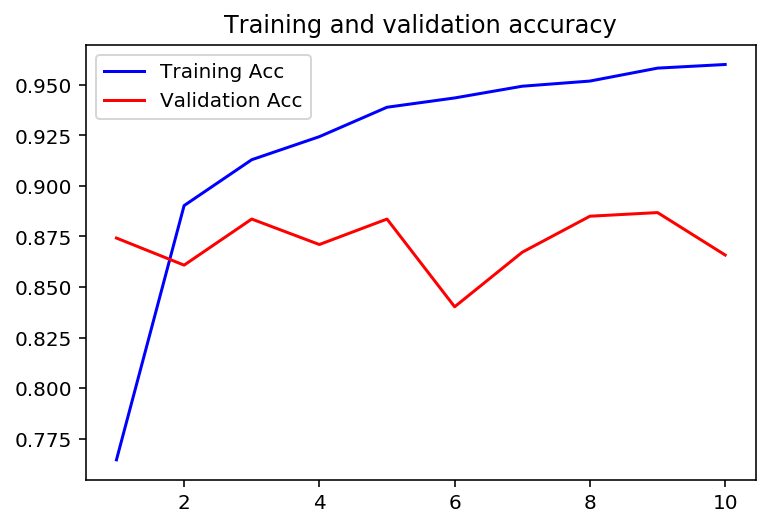

In [4]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()